In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from utils.color_transfer import color_transfer

In [2]:
# Load images
imageA = io.imread("./data/majestic-mountain-peaks.jpg") / 255.0
imageB = io.imread("./data/Sunset.jpg") / 255.0

/mnt5/home/netanel/wasserstein_convolution/utils/color_transfer.py:252: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 15760 negative Z values that have been clipped to zero
  out_src_rgb = color.lab2rgb(out_src_lab)
/mnt5/home/netanel/wasserstein_convolution/utils/color_transfer.py:252: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 14858 negative Z values that have been clipped to zero
  out_src_rgb = color.lab2rgb(out_src_lab)
/mnt5/home/netanel/wasserstein_convolution/utils/color_transfer.py:252: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 13621 negative Z values that have been clipped to zero
  out_src_rgb = color.lab2rgb(out_src_lab)


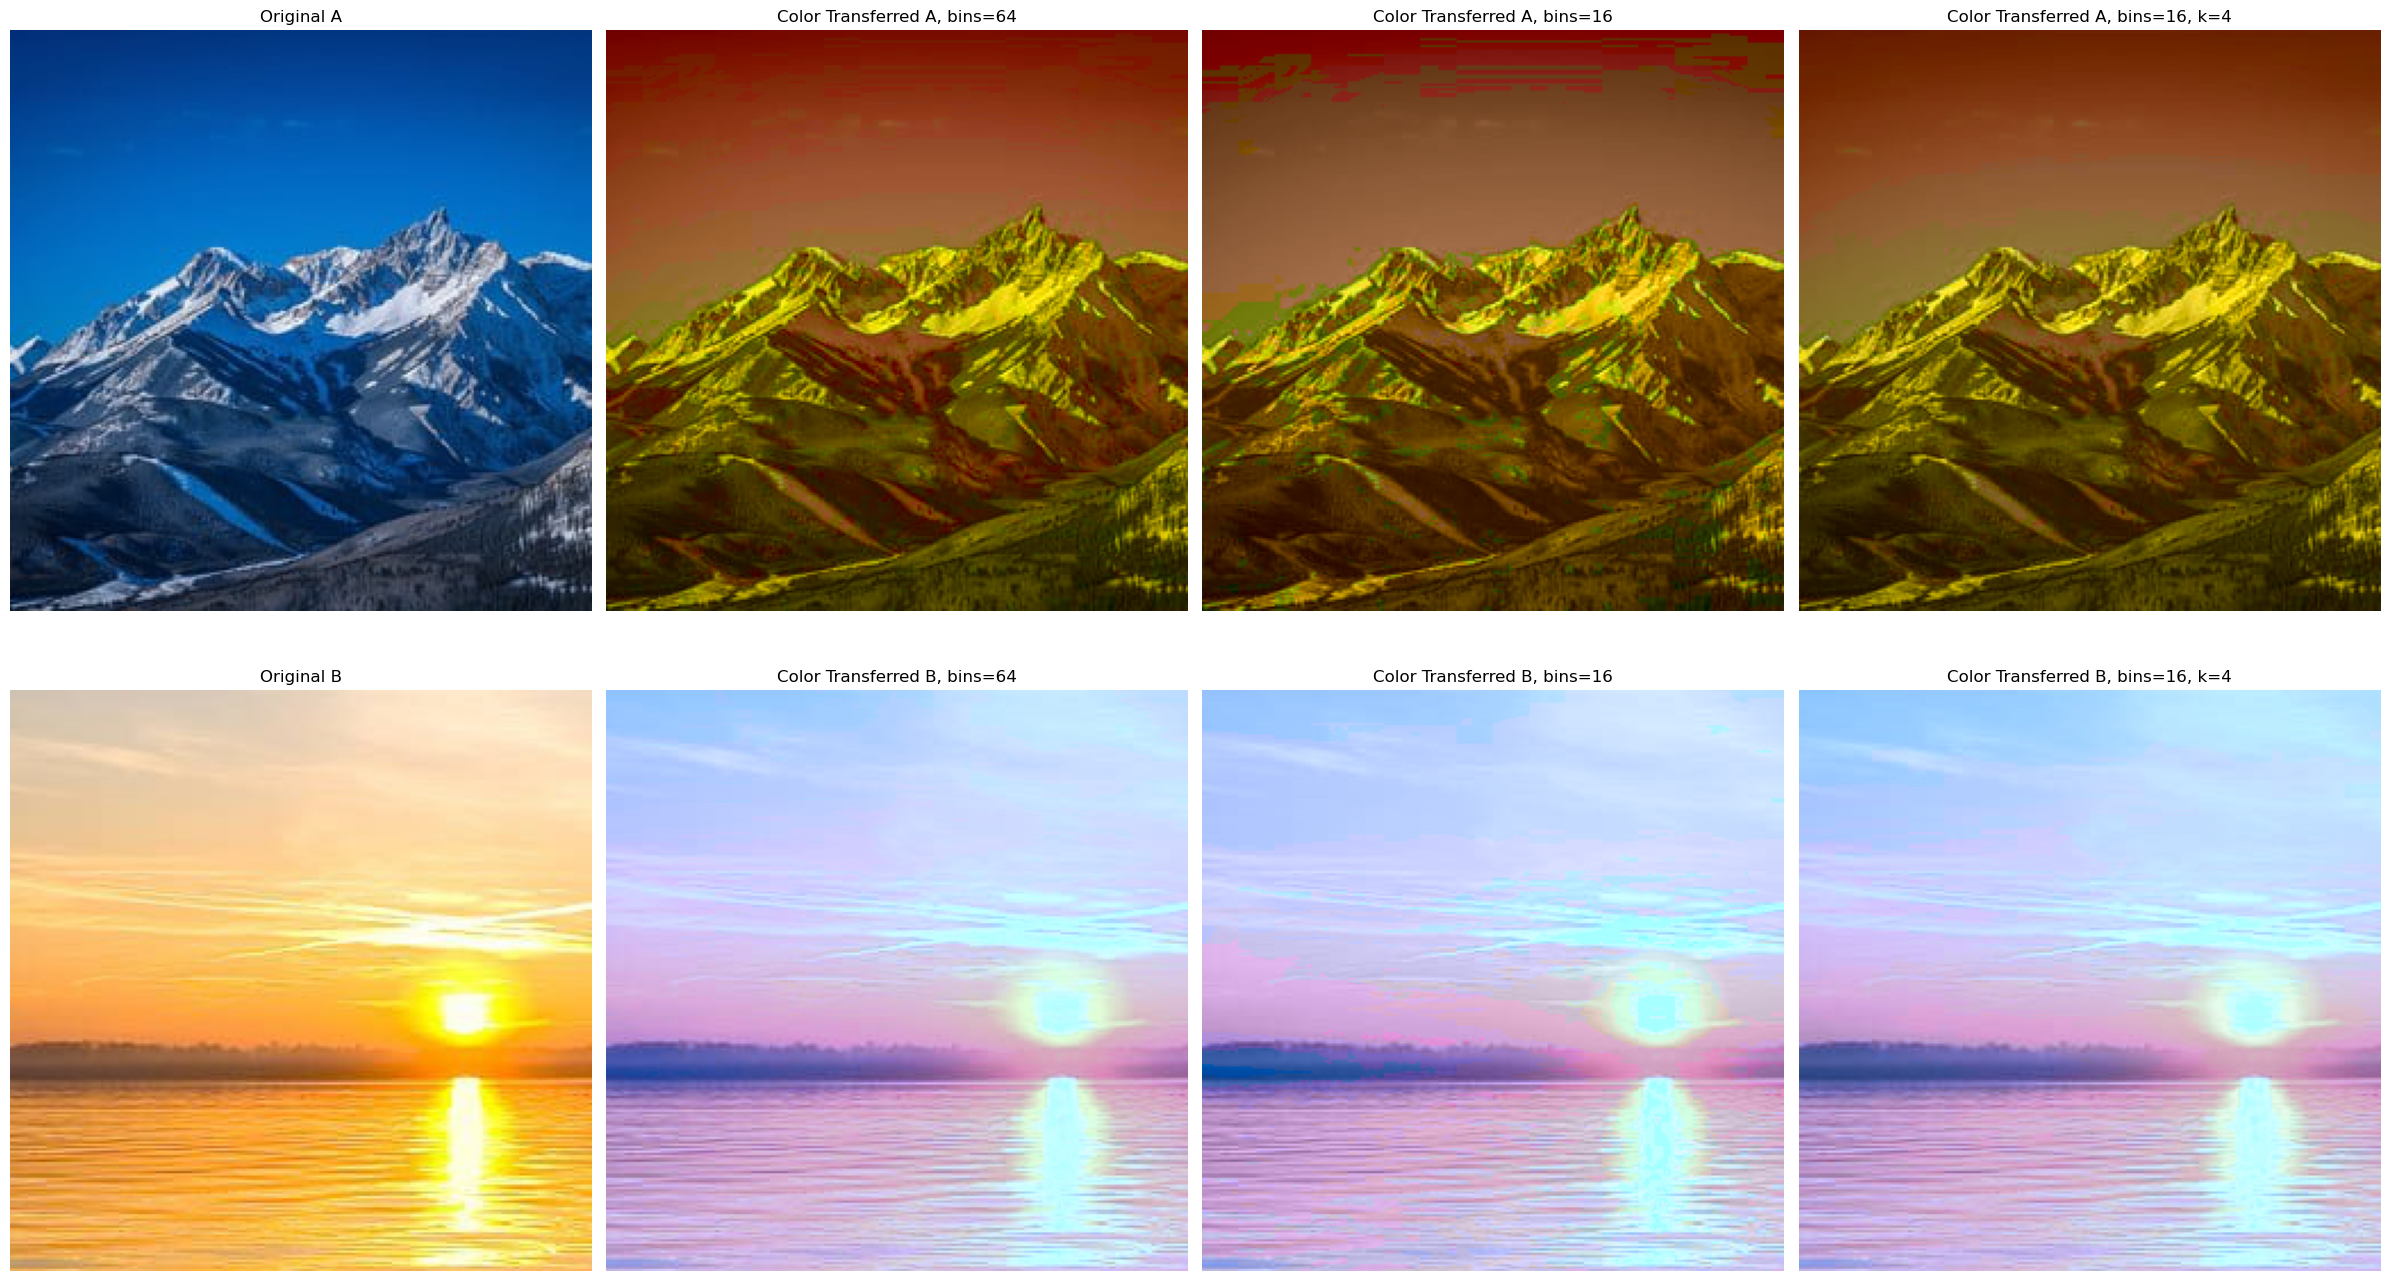

In [4]:
# Perform color transfer
transferredA, transferredB, _ = color_transfer(imageA, imageB, n_bins=64, t=0.5, gamma=0.004, match_l=False, sharpen_entropy=False, max_iter=2000, tol=1e-5, use_knn=False)
transferredA_ds, transferredB_ds, _ = color_transfer(imageA, imageB, n_bins=16, t=0.5, gamma=0.004, match_l=False, sharpen_entropy=False, max_iter=2000, tol=1e-5, use_knn=False, k=4)
transferredA_ds_knn, transferredB_ds_knn, _ = color_transfer(imageA, imageB, n_bins=16, t=0.5, gamma=0.004, match_l=False, sharpen_entropy=False, max_iter=2000, tol=1e-5, use_knn=True, k=4)

# Create a 2-row by 4-column layout
plt.figure(figsize=(24, 14))

# First row (All "A" images)
images_A = [imageA, transferredA, transferredA_ds, transferredA_ds_knn]
titles_A = ["Original A", "Color Transferred A, bins=64", "Color Transferred A, bins=16", "Color Transferred A, bins=16, k=4"]

# Second row (All "B" images)
images_B = [imageB, transferredB, transferredB_ds, transferredB_ds_knn]
titles_B = ["Original B", "Color Transferred B, bins=64", "Color Transferred B, bins=16", "Color Transferred B, bins=16, k=4"]

# Plot first row (All "A" images)
for i, (img, title) in enumerate(zip(images_A, titles_A), 1):
    plt.subplot(2, 4, i)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

# Plot second row (All "B" images)
for i, (img, title) in enumerate(zip(images_B, titles_B), 5):
    plt.subplot(2, 4, i)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


t = 0.0 done


/mnt5/home/netanel/wasserstein_convolution/utils/color_transfer.py:252: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 33 negative Z values that have been clipped to zero
  out_src_rgb = color.lab2rgb(out_src_lab)


t = 0.25 done


/mnt5/home/netanel/wasserstein_convolution/utils/color_transfer.py:252: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 15652 negative Z values that have been clipped to zero
  out_src_rgb = color.lab2rgb(out_src_lab)


t = 0.5 done


/mnt5/home/netanel/wasserstein_convolution/utils/color_transfer.py:252: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 31782 negative Z values that have been clipped to zero
  out_src_rgb = color.lab2rgb(out_src_lab)


t = 0.75 done


/mnt5/home/netanel/wasserstein_convolution/utils/color_transfer.py:252: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 43732 negative Z values that have been clipped to zero
  out_src_rgb = color.lab2rgb(out_src_lab)


t = 1.0 done


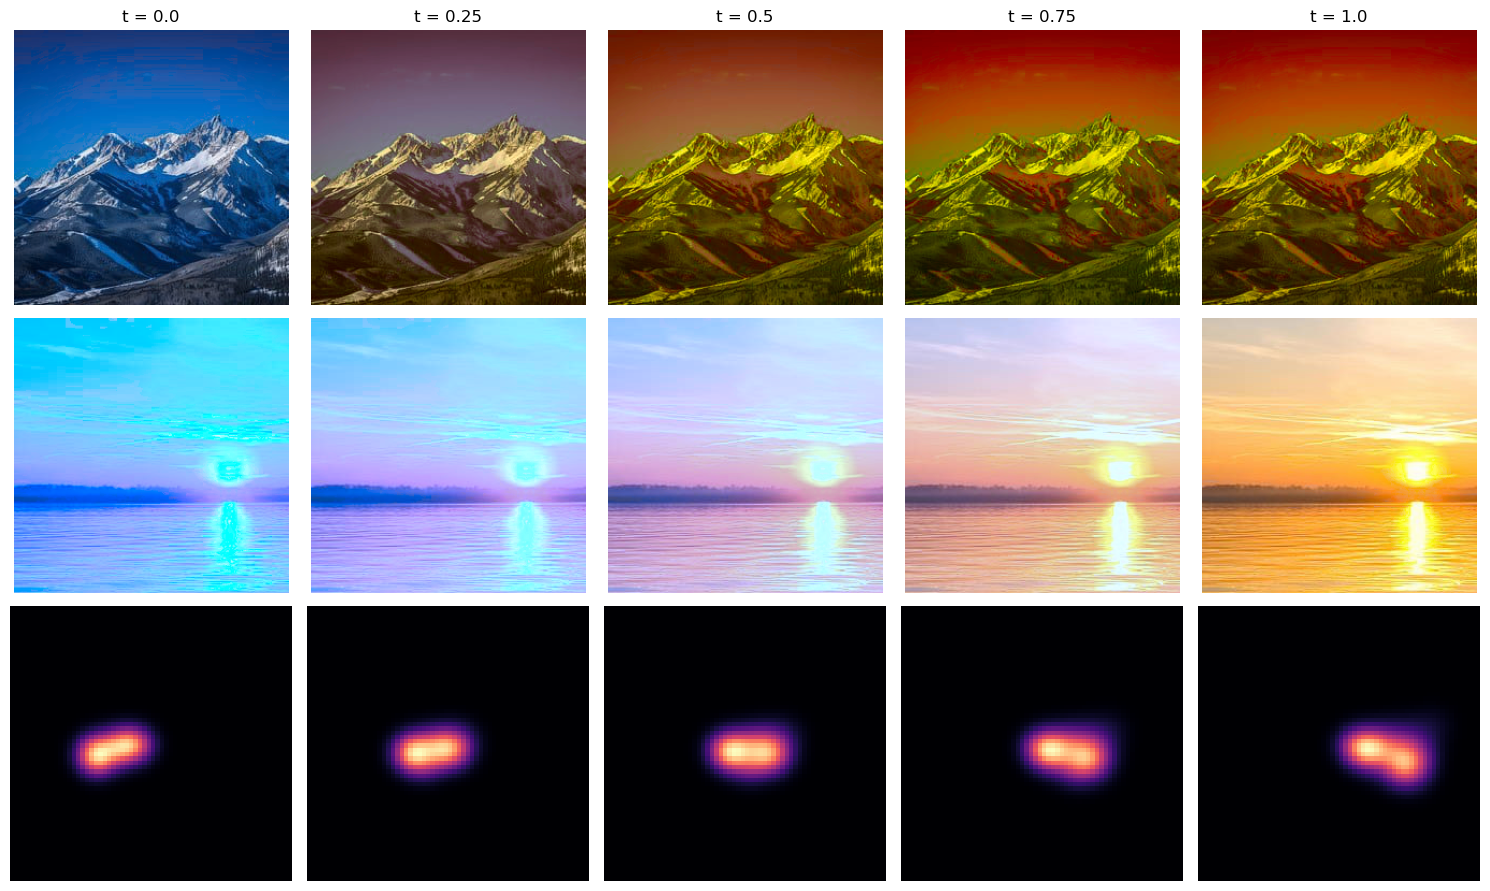

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load images
imageA = io.imread("./data/majestic-mountain-peaks.jpg") / 255.0
imageB = io.imread("./data/Sunset.jpg") / 255.0

# List of interpolation values for color transfer
t_values = [0.0, 0.25, 0.5, 0.75, 1.0]

# Store results for visualization
transferredA_list = []
transferredB_list = []
mu_bar_list = []

# Run color transfer for each t
for t in t_values:
    transferredA, transferredB, mu_bar = color_transfer(
        imageA, imageB, n_bins=64, t=t, gamma=0.004, 
        match_l=False, sharpen_entropy=True, max_iter=2000, tol=1e-5
    )
    transferredA_list.append(transferredA)
    transferredB_list.append(transferredB)
    mu_bar_list.append(mu_bar)
    print(f"t = {t} done")

# Create figure with 3 rows and len(t_values) columns
fig, axes = plt.subplots(3, len(t_values), figsize=(15, 9))

# Plot first row: Original ImageA
for i, t in enumerate(t_values):
    axes[0, i].imshow(transferredA_list[i])
    axes[0, i].set_title(f"t = {t}")
    axes[0, i].axis("off")

# Plot second row: Transferred ImageB
for i, t in enumerate(t_values):
    axes[1, i].imshow(transferredB_list[i])
    axes[1, i].axis("off")

# Plot third row: Histogram mu_bar (color distributions)
for i, t in enumerate(t_values):
    axes[2, i].imshow(mu_bar_list[i], cmap="magma", aspect="auto")
    axes[2, i].axis("off")

# Set row labels
axes[0, 0].set_ylabel("Image A")
axes[1, 0].set_ylabel("Image B")
axes[2, 0].set_ylabel("μ_bar")

# Save figure
plt.tight_layout()
plt.savefig("color_transfer_interpolation.jpg")
plt.show()
